# Introduction to Python Session6

Our last session introduced the idea of centrality. We looked at several applications of centrality in addition to some basic graph traversal algorithms. Today we are going to revisit the start of the chapter and look at an example on how to read in data using an API followed by a a look into eigenvector centrality. 

Last week's HW asked was to go over some tutorials on functions. We are going to start this session by using functions provided in the text to read some real world data. 

## Reading in Real World Data Using an API and Finding Simple Information

What is an API? We can take wikipedia's definition which states and API is "a set of functions and procedures allowing the creation of applications that access the features or data of an operating system, application, or other service." In other words, the API is a system that can be communicated with using some coding language to fetch data. 

The social network analysis text provides us with the API for getting data directly from the LiveJournal Source without having to ever use a web browser in a traditional sense. The API is as follows:

http://www.livejournal.com/misc/fdata.bml?user=

We are going to be using a text book supplied function to build our graph network of connections from the live journal site. We are grabbing a community of users based on if someone gets a comment or leaves a comment. The function we are provided with should be able to make that distinction. 

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request as urllib

In [41]:
def read_lj_friends(g, name):
    """Fetch a list of friends from the API, walk through the lines
    in the response and create edges in graph g"""
    
    # fetch the friend-list from LiveJournal
    response = urllib.urlopen(r'https://www.livejournal.com/misc/fdata.bml?user=' + name)
    
    # walk trough the lines in the response and add each one as an edge
    # in a network for line in response.readlines()
    for line in response.readlines():
        # comments in the response start with a '#'
        if line.startswith(b'#'):
            
            continue
        
        # make sure we don't have an empty line
        parts = line.split()
        
        if len(parts) == 0:
            
            continue
            
        # the format s "< name" (incoming) or "> name" (outgoing)
        # add the edge to the network
        if parts[0] == '<':
            
            g.add_edge(parts[1], name)
            
        else:
            
            g.add_edge(name, parts[1])
            
    return g

The above code may look daunting and its not expected for you to be able to write something along these lines, however you should be able to understand what each step of the function is doing. I am going to break it down. 

* Define your function and specify the arguments that your function will take such as g and name. 

* use the API to save the friends list in the local response variable 

* use a for loop to crawl through each line and identify which friend commented using # to define connections

* Add if condition to direct the program to skip over empty lines

* add If Else to specify if a person is commenting or getting a comment 

Similar to the book, we will use the name Valerois as well to build our graph. 

302


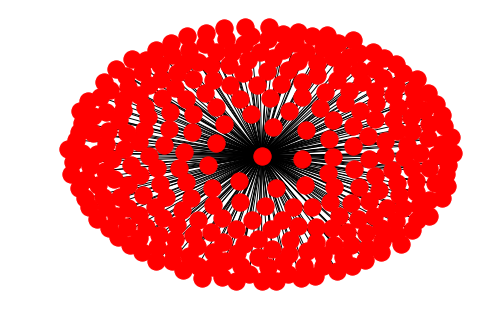

In [42]:
g=nx.Graph()

read_lj_friends(g, 'valerois')

print(len(g))

nx.draw(g)

Visually, this is a very overwhelming network and its difficult to see any sort of connections. This seems like the best time to apply some of the metrics we learned during our last session. Recall that degree centrality scores our nodes based on their popularity. 

In [67]:
d=nx.degree_centrality(g) 

print(d)

{'valerois': 1.0, b'bagira': 0.0033222591362126247, b'angerona': 0.0033222591362126247, b'yankel': 0.0033222591362126247, b'yelya': 0.0033222591362126247, b'ponka': 0.0033222591362126247, b'marinka': 0.0033222591362126247, b'saper': 0.0033222591362126247, b'levinius': 0.0033222591362126247, b'monella': 0.0033222591362126247, b'irbisa': 0.0033222591362126247, b'innaplanetyanka': 0.0033222591362126247, b'hutshepsut': 0.0033222591362126247, b'skyg74': 0.0033222591362126247, b'samoleg': 0.0033222591362126247, b'actr': 0.0033222591362126247, b'gottfrid': 0.0033222591362126247, b'krimsky': 0.0033222591362126247, b'nelis': 0.0033222591362126247, b'ptfenix': 0.0033222591362126247, b'leprechaun': 0.0033222591362126247, b'a_u': 0.0033222591362126247, b'e_f': 0.0033222591362126247, b'boctok': 0.0033222591362126247, b'karial': 0.0033222591362126247, b'wattson': 0.0033222591362126247, b'baryshnia': 0.0033222591362126247, b'ntl': 0.0033222591362126247, b'salamandrina_': 0.0033222591362126247, b'ant_

As you can see, the output is still generally messy and most people would not have the time to parse through all of those results. Lets see some of the more high level attributes of our network. The density is a measure of how complete a graph is and the diameter tells us the greatest distance between any two pairs or nodes. 

In [68]:
nx.density(g)

0.006622516556291391

In [69]:
print("The Number of Nodes: ", nx.number_of_nodes(g))
print("The Number of Edges: ",  nx.number_of_edges(g))

The Number of Nodes:  302
The Number of Edges:  301


In [70]:
nx.diameter(g)

2

## Introduction to Eigenvector Centrality 

This next session of the tutorial is going to introduce the idea of eigenvector centrality. We will not be using the graph we generated above since it will get very complicated and involved in terms of using more advanced linear algebra specific to star graphs. (Perron-Frobenius theorem) 

We will instead re-generate the simple graph that we used in our last session. 

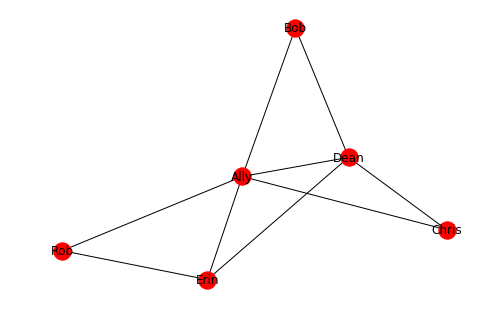

In [71]:
G = nx.Graph()

nodes = ['Ally','Bob','Chris','Dean', 'Erin', 'Rob']
G.add_nodes_from(nodes)

edges = [('Ally','Chris'),
         ('Ally','Bob'),
         ('Bob','Dean'),
         ('Ally','Dean'),
         ('Chris','Dean'), 
         ('Erin', 'Dean'),
        ('Rob', 'Ally'), 
        ('Ally', 'Erin'),
        ('Erin', 'Rob')]

G.add_edges_from(edges)

nx.draw(G, with_labels = True)
plt.show()

The eigenvector centrality measures the influence a particular node may have in a network. It assigns scores similar to the other centrality measures we looked at with the caveat being that scores are based off connections to other high scoring nodes. 

In graph theory, eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

The math is as follows:

For a given graph G=(V,E) where V are verticies and E are edges, we have an adjacency matrix A. From our previous lesson, we know that the entry in our ith row and jth column is a 1 if vertex Vi is linked to vertex Vj, 0 otherwise. I will avoid the mathematical formulation since it is more involved than some of the previous concepts we looked at. We don't have an understanding of eigenvectors and eigenvalues. That is something that will have to be its own session since it plays a central part in many data science process. 

At the highest level, the formulation is as follows:

$Ax=\lambda x$

A is our Adjacency matrix. If you recall from our previous sessions, each entry in the ith row and jth column corresponds to a connection between nodes i and j. If there is a connection, then that entry is 1, otherwise 0. Lambda is our eigenvalue and by the Perron–Frobenius theorem, there exists a positive unique solution if lambda is the largest eigen value associated with the eigenvector of our adjacency matrix. This might no make sense now but it will with a better understanding of linear algebra. 

In [73]:
centrality = nx.eigenvector_centrality(G)

print(['%s %0.2f'%(node,centrality[node]) for node in centrality])

['Ally 0.56', 'Bob 0.32', 'Chris 0.32', 'Dean 0.49', 'Erin 0.41', 'Rob 0.29']


According to our eigenvector centrality, Ally is the most influential person in this network based on the centrality measures of the nodes she is connected to. 

## Homework: 

Start the following linear algebra sessions: https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/vector-introduction-linear-algebra

This is a wonderful resource that will introduce you to the core concepts in linear algebra needed for data science. 